In [2]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import os

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from pathlib import Path
from PIL import Image

ModuleNotFoundError: No module named 'tensorflow'

In [3]:
dataset_path = os.listdir('/content/drive/MyDrive/Colab Notebooks/Mango_Leaves')

In [4]:
print (dataset_path)  #what kinds of classes are in this dataset

print("Types of classes labels found: ", len(dataset_path))

['Healthy', 'Anthracnose', 'Powdery Mildew', 'Sooty Mould']
Types of classes labels found:  4


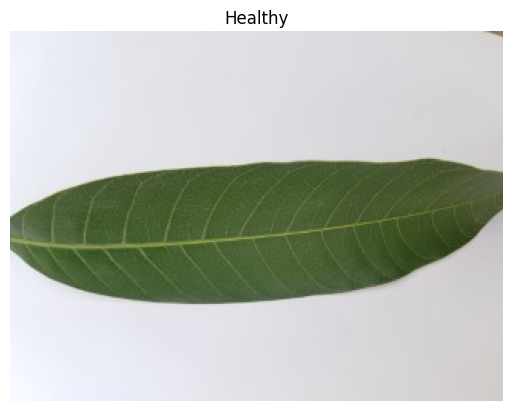

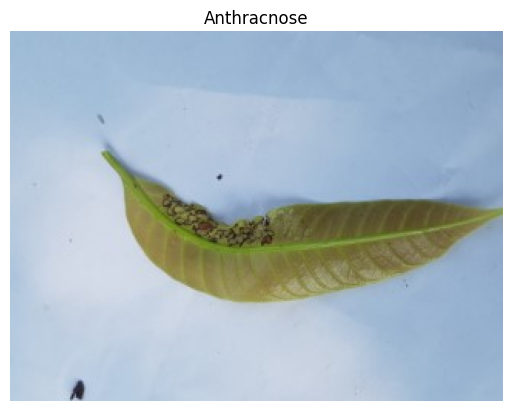

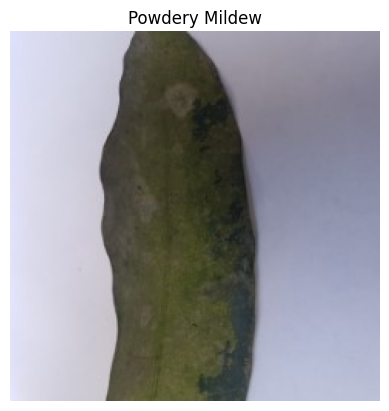

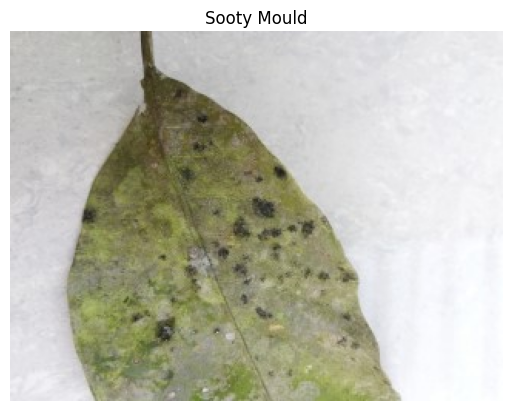

In [5]:
# Define the directory where your images are stored
data_dir = Path('/content/drive/MyDrive/Colab Notebooks/Mango_Leaves')  # Update this with your actual data directory

# Define the class names
class_names = ['Healthy', 'Anthracnose', 'Powdery Mildew', 'Sooty Mould']

# Display a sample image from each class
for class_name in class_names:
    image_list = list(data_dir.glob(f'{class_name}/*'))
    if image_list:
        sample_image_path = image_list[0]
        sample_image = Image.open(str(sample_image_path))
        plt.imshow(sample_image)
        plt.title(class_name)
        plt.axis('off')
        plt.show()
    else:
        print(f"No images found for class {class_name}")

In [6]:
batch_size = 32
img_height = 240
img_width = 240

In [7]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  '/content/drive/MyDrive/Colab Notebooks/Mango_Leaves',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2000 files belonging to 4 classes.
Using 1600 files for training.


In [8]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  '/content/drive/MyDrive/Colab Notebooks/Mango_Leaves',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2000 files belonging to 4 classes.
Using 400 files for validation.


In [9]:
class_names = train_ds.class_names
print(class_names)

['Anthracnose', 'Healthy', 'Powdery Mildew', 'Sooty Mould']


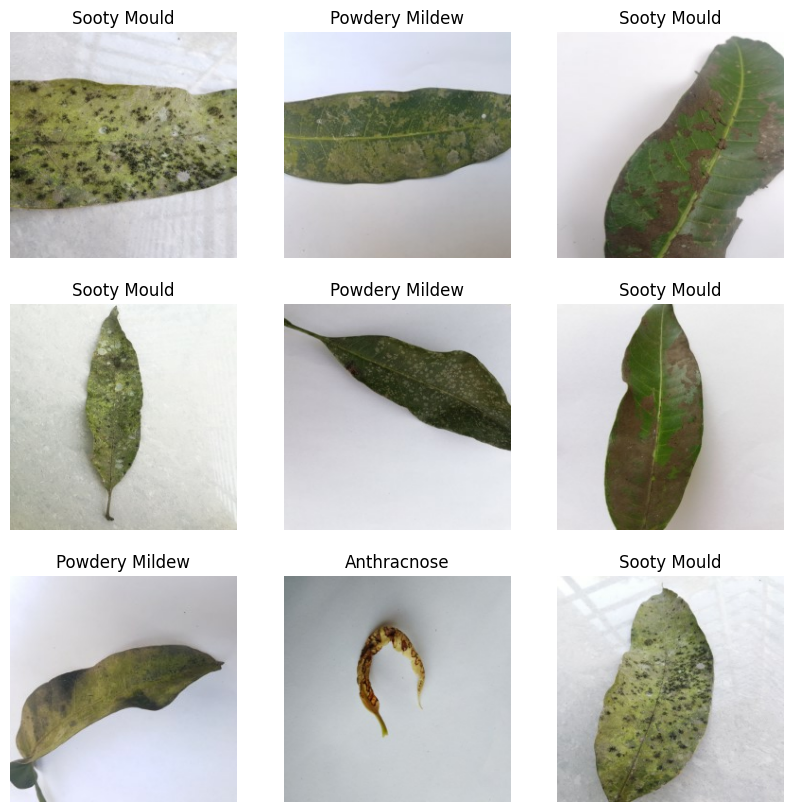

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [11]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 240, 240, 3)
(32,)


In [12]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [13]:
normalization_layer = layers.Rescaling(1./255)

In [14]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.054901246 0.9725491


In [15]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 4, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 4, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 4, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(240, activation='relu'),
  layers.Dense(num_classes)
])

In [16]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 240, 240, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 240, 240, 16)      784       
                                                                 
 max_pooling2d (MaxPooling2  (None, 120, 120, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 120, 120, 32)      8224      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 60, 60, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        3

In [18]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
50/50 [==============================] - 196s 4s/step - loss: 1.7442 - accuracy: 0.3275 - val_loss: 1.2164 - val_accuracy: 0.4250
Epoch 2/10
50/50 [==============================] - 148s 3s/step - loss: 0.8275 - accuracy: 0.6756 - val_loss: 0.6083 - val_accuracy: 0.7975
Epoch 3/10
50/50 [==============================] - 151s 3s/step - loss: 0.4004 - accuracy: 0.8544 - val_loss: 0.5176 - val_accuracy: 0.8300
Epoch 4/10
50/50 [==============================] - 154s 3s/step - loss: 0.2558 - accuracy: 0.8981 - val_loss: 0.2495 - val_accuracy: 0.9225
Epoch 5/10
50/50 [==============================] - 147s 3s/step - loss: 0.1659 - accuracy: 0.9394 - val_loss: 0.2992 - val_accuracy: 0.9050
Epoch 6/10
50/50 [==============================] - 149s 3s/step - loss: 0.2146 - accuracy: 0.9162 - val_loss: 0.3472 - val_accuracy: 0.8675
Epoch 7/10
50/50 [==============================] - 148s 3s/step - loss: 0.1443 - accuracy: 0.9400 - val_loss: 0.4984 - val_accuracy: 0.8075
Epoch 8/10
50

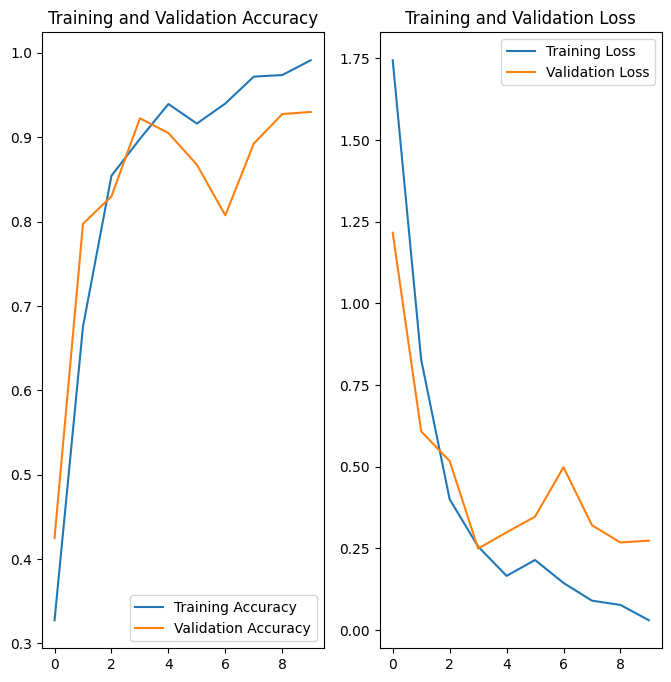

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [20]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

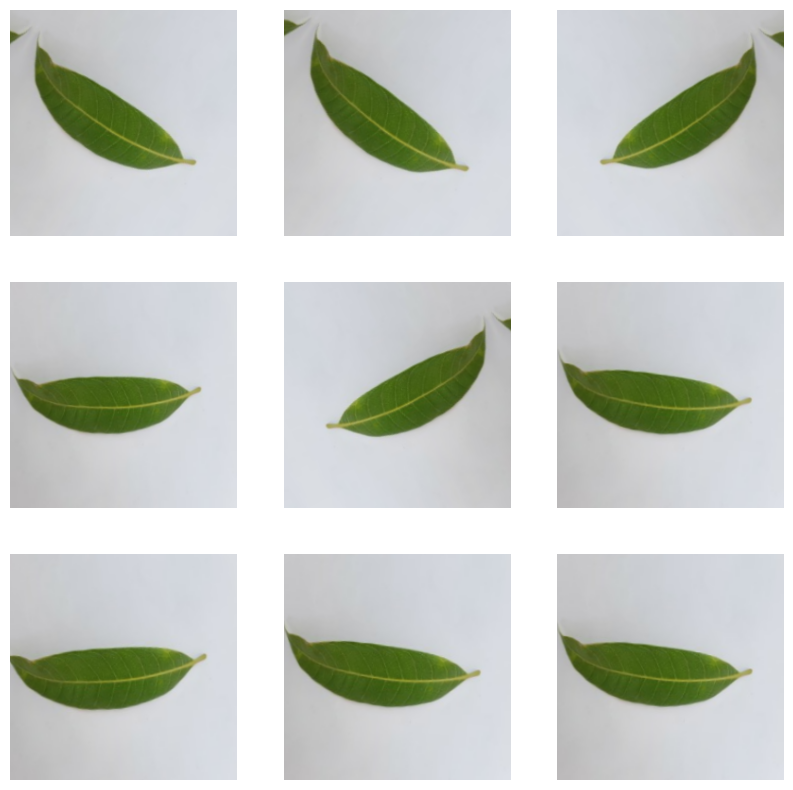

In [21]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [22]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 4, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 4, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 4, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(240, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

In [23]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 240, 240, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 240, 240, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 240, 240, 16)      784       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 120, 120, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 120, 120, 32)      8224      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 60, 60, 32)        0         
 g2D)                                                 

In [25]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
50/50 [==============================] - 166s 3s/step - loss: 1.4598 - accuracy: 0.4013 - val_loss: 0.9273 - val_accuracy: 0.6475
Epoch 2/15
50/50 [==============================] - 171s 3s/step - loss: 0.6832 - accuracy: 0.6931 - val_loss: 0.4002 - val_accuracy: 0.8575
Epoch 3/15
50/50 [==============================] - 166s 3s/step - loss: 0.3963 - accuracy: 0.8375 - val_loss: 0.6790 - val_accuracy: 0.7375
Epoch 4/15
50/50 [==============================] - 164s 3s/step - loss: 0.3110 - accuracy: 0.8650 - val_loss: 0.2308 - val_accuracy: 0.8975
Epoch 5/15
50/50 [==============================] - 170s 3s/step - loss: 0.2622 - accuracy: 0.8894 - val_loss: 0.2736 - val_accuracy: 0.8750
Epoch 6/15
50/50 [==============================] - 165s 3s/step - loss: 0.2494 - accuracy: 0.8975 - val_loss: 0.2384 - val_accuracy: 0.9125
Epoch 7/15
50/50 [==============================] - 163s 3s/step - loss: 0.2197 - accuracy: 0.9075 - val_loss: 0.3377 - val_accuracy: 0.8550
Epoch 8/15
50

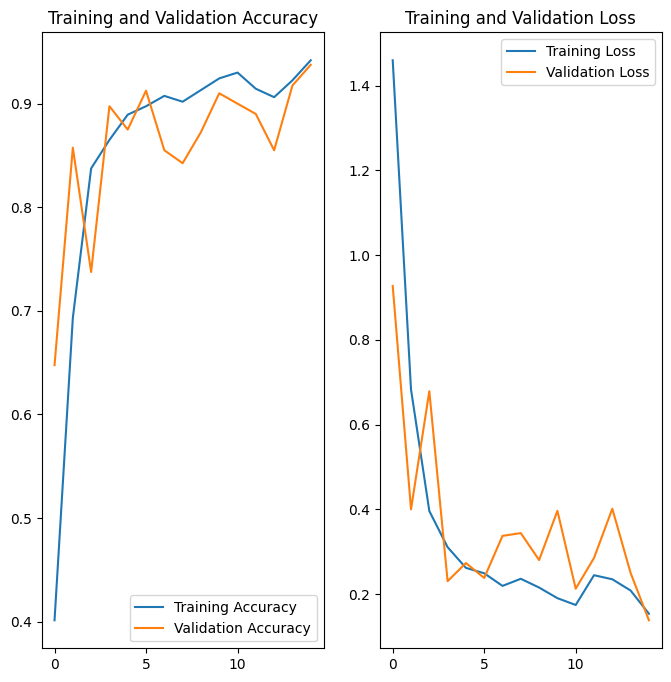

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [1]:

drive_img_path = '/content/drive/MyDrive/Colab Notebooks/test2.jpg'


img = tf.keras.utils.load_img(drive_img_path, target_size=(img_height, img_width))

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

predicted_class_index = np.argmax(score)

print(class_names)

if predicted_class_index < len(class_names):
    class_name = class_names[predicted_class_index]
    print("This image most likely belongs to {} with a {:.2f} percent confidence."
          .format(class_name, 100 * np.max(score)))
else:
    print("Error: Predicted class index is out of range.")

NameError: name 'tf' is not defined

In [61]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

In [62]:
TF_MODEL_FILE_PATH = 'model.tflite' # The default path to the saved TensorFlow Lite model

interpreter = tf.lite.Interpreter(model_path=TF_MODEL_FILE_PATH)

In [63]:
interpreter.get_signature_list()

{'serving_default': {'inputs': ['sequential_1_input'], 'outputs': ['outputs']}}

In [64]:
classify_lite = interpreter.get_signature_runner('serving_default')
classify_lite

In [65]:
predictions_lite = classify_lite(sequential_1_input=img_array)['outputs']
score_lite = tf.nn.softmax(predictions_lite)

In [66]:
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score_lite)], 100 * np.max(score_lite))
)

This image most likely belongs to Powdery Mildew with a 99.78 percent confidence.


In [59]:
print(np.max(np.abs(predictions - predictions_lite)))

1.4305115e-06
